In [1]:
import sys
sys.path.insert(0, r'../../libraries/quetzal')
sys.path.insert(0, r'../../libraries/syspy')

from quetzal.io import  gtfs_importer
from quetzal.model import stepmodel
% matplotlib inline

In [2]:
training_folder = '../../'

In [3]:
sm = stepmodel.read_hdf(training_folder + r'model/preparation/road_model.hdf')
#sm = stepmodel.read_hdf(training_folder + 'model/merged_after.hdf')

read_hdf: : 100%|██████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 24.71it/s]


# clustering

In [4]:
sm.preparation_clusterize_nodes(1000)

100%|███████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 62327.13it/s]


# walkmodel

In [5]:
sm.preparation_footpaths()

In [6]:
threshold = 200
sm.preparation_ntlegs(
    short_leg_speed=3,
    long_leg_speed=10,
    threshold=threshold,
    zone_to_transit=True,
    zone_to_road=True
)

In [ ]:
sm.to

In [7]:
sm.to_hdf(training_folder + 'model/preparation/walk_model.hdf')  

to_hdf(overwriting): 100%|█████████████████████████████████████████████████████████████| 31/31 [00:03<00:00,  9.26it/s]


In [9]:
sm.to_json(
    training_folder + 'model/last', 
    omitted_attributes=('road_links', 'road_nodes', 'networkcaster_neighbors', 'networkcaster_road_access')  
)  

to_hdf(overwriting): 100%|█████████████████████████████████████████████████████████████| 31/31 [00:16<00:00,  1.85it/s]


# zone_to_transit monitoring

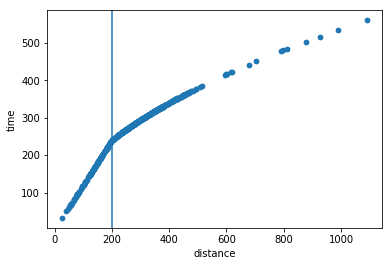

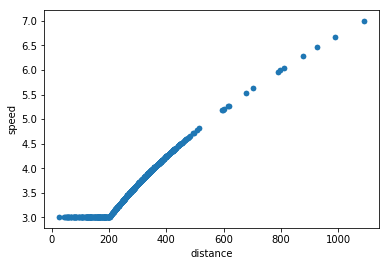

In [8]:
ax = sm.zone_to_transit.plot(kind='scatter', x='distance', y='time')
ax.axvline(x=threshold)
ax = sm.zone_to_transit.plot(kind='scatter', x='distance', y='speed')